In [1]:
from nanomesh.generator import Generator
import SimpleITK as sitk
from nanomesh.utils import show_slice, show_volume, generate_mesh_from_binary_image

import numpy as np

import math

In [2]:
gen = Generator(680, math.sqrt(2)*680, 0.24*680)

# Possible rotation/transformation of the coordinate system
theta = math.pi * 1/180
c = math.cos(theta)
s = math.sin(theta)
trans = np.array([
    [ c, 0, s],
    [ 0, 1, 0],
    [-s, 0, c]
])

vol = gen.generate([100,100,100], [10,10,10], transform=trans, bin_val=[0.,1.])

# Convert to ITK image

im = sitk.GetImageFromArray(vol.astype('uint8'))
show_slice(im, dim='z',scale=2)

interactive(children=(IntSlider(value=49, description='z', max=99), Output()), _dom_classes=('widget-interact'…

In [7]:
import pygalmesh
print(pygalmesh.__file__)
help(pygalmesh.generate_from_array)
mesh = generate_mesh_from_binary_image(im, h=[1.5]*3, perturb=False, 
                                       lloyd=False,
                                       odt=False,
                                       max_radius_surface_delaunay_ball=0.0,
                                       max_cell_circumradius=0.,
                                       max_facet_distance=1.,
                                       exude=True,
                                       min_facet_angle=0.,
                                       max_edge_size_at_feature_edges=1.5,
                                       max_circumradius_edge_ratio=0.,
                                       bounding_box=True)
import pyvista as pv
pv.plot_itk(mesh)

/home/nico/anaconda3/lib/python3.8/site-packages/pygalmesh-0.9.2-py3.8-linux-x86_64.egg/pygalmesh/__init__.py
Help on function generate_from_array in module pygalmesh.main:

generate_from_array(vol, h, lloyd=False, odt=False, perturb=True, exude=True, max_edge_size_at_feature_edges=0.0, min_facet_angle=0.0, max_radius_surface_delaunay_ball=0.0, max_cell_circumradius=0.0, max_facet_distance=0.0, max_circumradius_edge_ratio=0.0, verbose=True, bounding_box=False, seed=0)



Viewer(geometries=[{'vtkClass': 'vtkPolyData', 'points': {'vtkClass': 'vtkPoints', 'name': '_points', 'numberO…

Viewer(geometries=[{'vtkClass': 'vtkPolyData', 'points': {'vtkClass': 'vtkPoints', 'name': '_points', 'numberO…

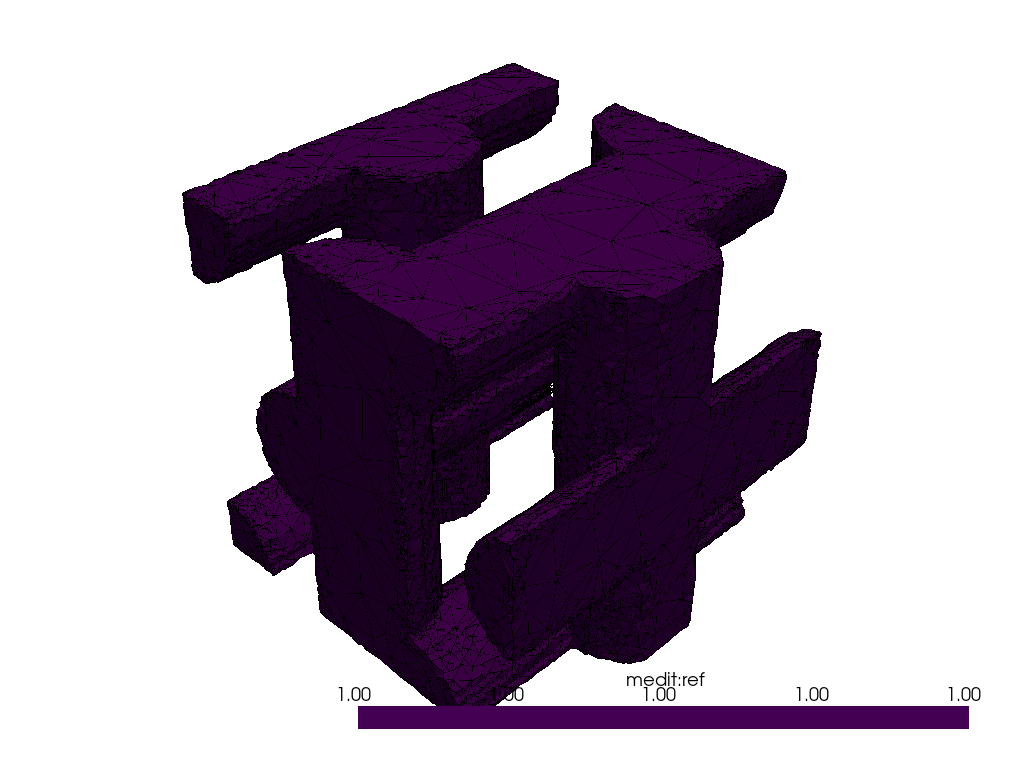

[(481.797140336048, 481.79843567536415, 481.80113436133803),
 (98.99977588281035, 99.00107122212648, 99.00376990810037),
 (0.0, 0.0, 1.0)]

In [10]:
import meshio
import pygmsh
meshio.write('ideal_twophase.vtk',mesh)

vtkmesh = pv.read('ideal_twophase.vtk')

bounds = [50,100,50,100,50,100]
clipped = vtkmesh.clip_box(bounds)
pv.set_plot_theme("document")

p = pv.Plotter(notebook=True)
p.add_mesh(vtkmesh, style='wireframe', color='black')
p.add_mesh(clipped)
p.show(use_ipyvtk=False)
